# **Airport DataSet**

In this analysis, we delve into a comprehensive dataset containing information about airports worldwide, including their geographical coordinates, altitudes, and names. The primary objectives are to explore the geographical distribution of airports, identify trends in altitude variations, and gain insights into the top countries with the most airports. We also employ machine learning techniques to uncover potential patterns and clusters among airports based on their geographical coordinates. The findings aim to provide valuable insights for decision-making in the aviation sector and a better understanding of global airport networks. Throughout this report, we present observations, insights, and conclusions, accompanied by data visualizations that enhance our understanding of airport distribution and characteristics.

**Importing Necessary Libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading DataSet**

In [5]:
df = pd.read_csv('/content/airports_data.csv')
df.head()

,Unnamed: 0,name,iata,icao,lat,lon,country,alt
0,0,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
1,1,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
2,2,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
3,3,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
4,4,Aarhus Sea Airport,QEA,EKAC,56.151993,10.247725,Denmark,1


**Data Cleaning**

In [6]:
df = df.drop(columns=["Unnamed: 0"])

In [7]:
numerical_stats = df[["lat", "lon", "alt"]].describe()

In [8]:
numerical_stats

,lat,lon,alt
count,5095.000000,5095.000000,5095.000000
mean,27.404842,-4.614261,1034.172915
std,27.059213,88.993647,1709.335333
min,-79.777687,-179.876007,-128.000000
25%,11.782035,-83.367478,65.000000
50%,35.212982,1.167172,344.000000
75%,46.028162,70.274987,1160.000000
max,83.699997,179.340500,14418.000000


In [9]:
unique_countries = df["country"].nunique()

In [10]:
print("Number of Unique Countries:", unique_countries)

Number of Unique Countries: 228


In [11]:
# Final DataSet
df.head()

,name,iata,icao,lat,lon,country,alt
0,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
1,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
2,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
3,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
4,Aarhus Sea Airport,QEA,EKAC,56.151993,10.247725,Denmark,1


**Data Visualization**

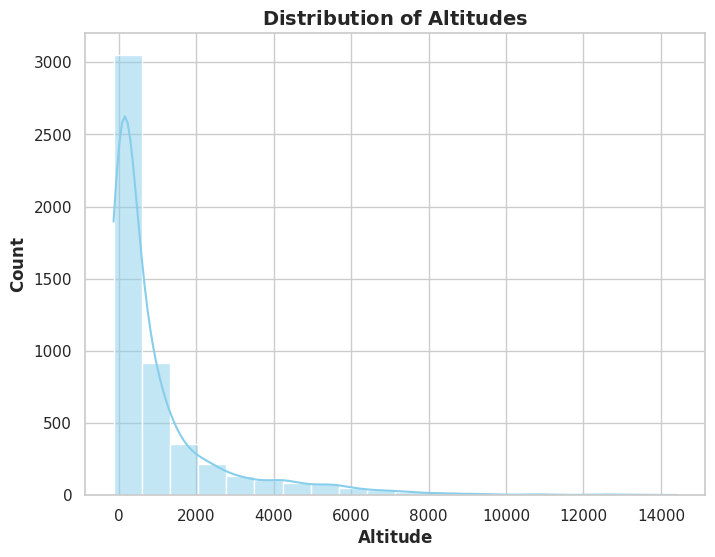

In [12]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.histplot(df['alt'], bins=20, kde=True, color='skyblue')
plt.title(r"$\bf{Distribution\ of\ Altitudes}$", fontsize=14)
plt.xlabel(r"$\bf{Altitude}$", fontsize=12)
plt.ylabel(r"$\bf{Count}$", fontsize=12)
plt.show()


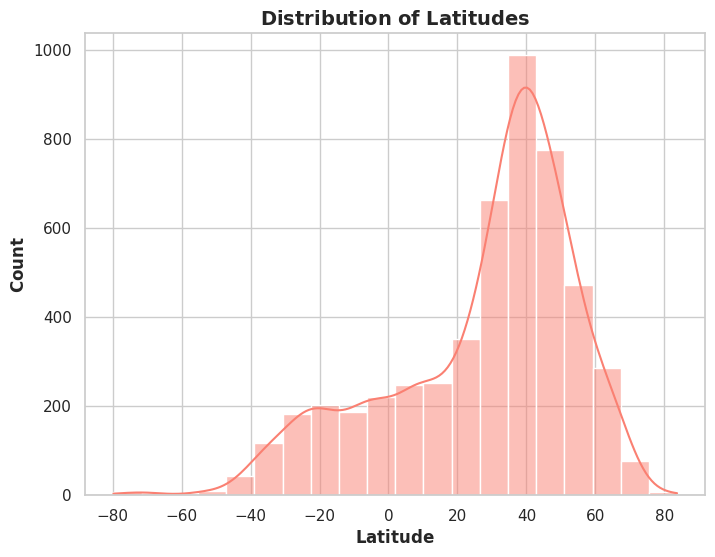

In [13]:
sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.histplot(df['lat'], bins=20, kde=True, color='salmon')
plt.title(r"$\bf{Distribution\ of\ Latitudes}$", fontsize=14)
plt.xlabel(r"$\bf{Latitude}$", fontsize=12)
plt.ylabel(r"$\bf{Count}$", fontsize=12)
plt.show()

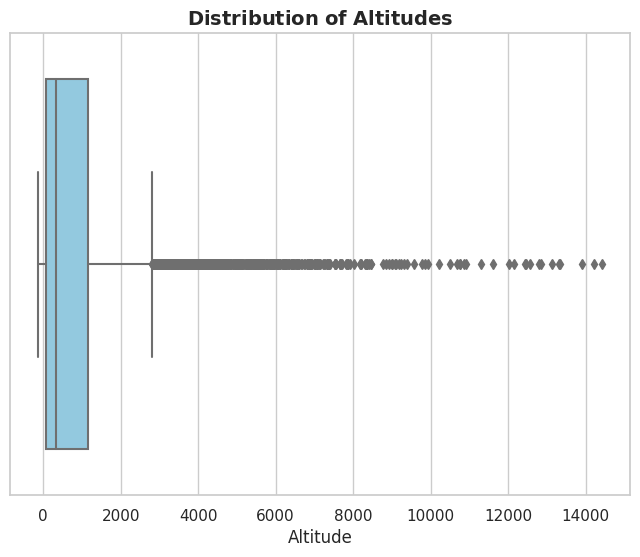

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['alt'], color='skyblue')
plt.title(r"$\bf{Distribution\ of\ Altitudes}$", fontsize=14)
plt.xlabel("Altitude")
plt.xticks(rotation=0)
plt.show()


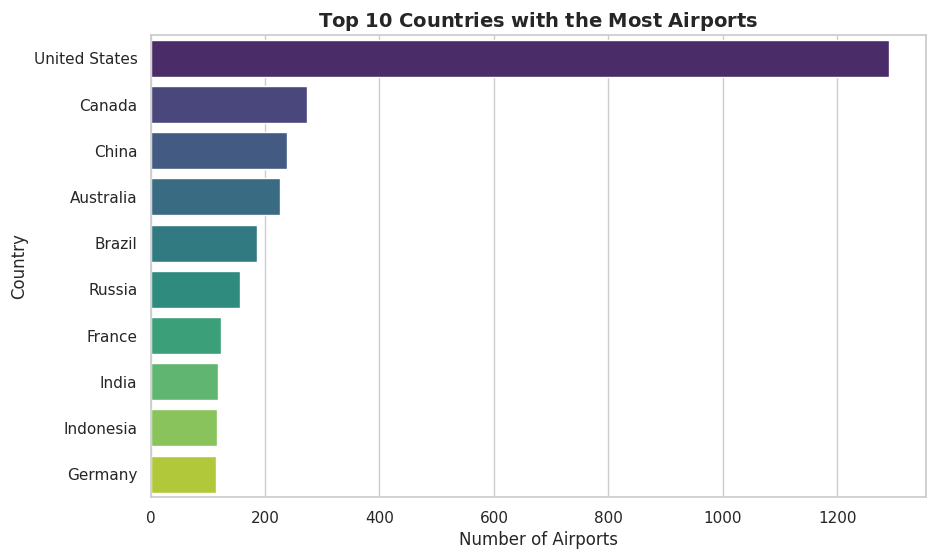

In [24]:
country_counts = df['country'].value_counts().head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
ax.set_title(r"$\bf{Top\ 10\ Countries\ with\ the\ Most\ Airports}$", fontsize=14)
plt.xlabel("Number of Airports")
plt.ylabel("Country")

plt.show()

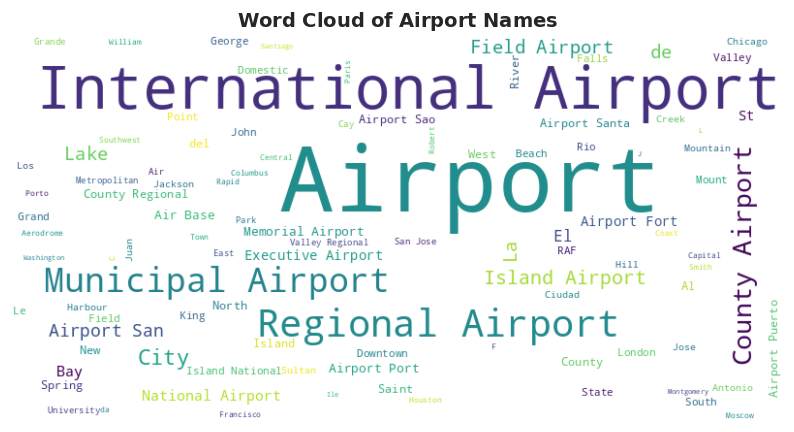

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

airport_names_text = ' '.join(df['name'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(airport_names_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(r"$\bf{Word\ Cloud\ of\ Airport\ Names}$", fontsize=14)
plt.axis('off')
plt.show()

In [32]:
import plotly.express as px
import pandas as pd

country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'airport_count']

fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="airport_count",
    hover_name="country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="<b>Number of Airports per Country</b>",
)

fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="White",
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="equirectangular"
    ),
)

fig.show()


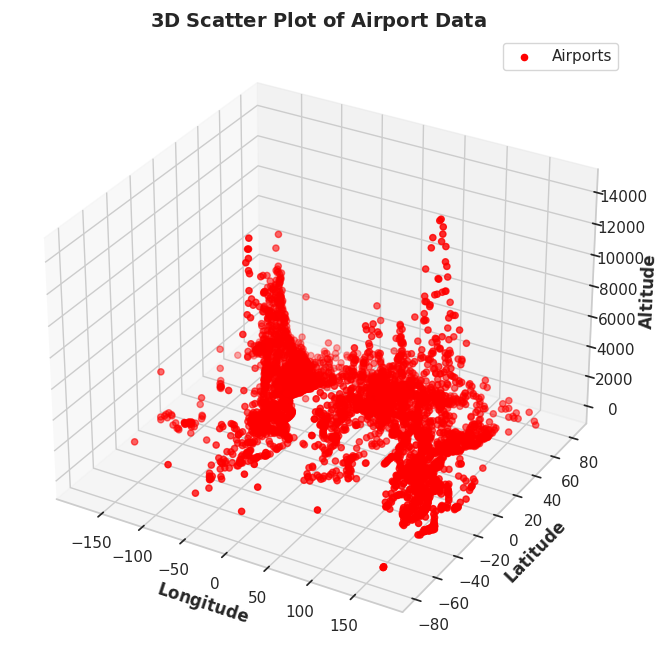

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['lon'], df['lat'], df['alt'], c='red', s=20, label='Airports')
ax.set_xlabel(r"$\bf{Longitude}$", fontsize=12)
ax.set_ylabel(r"$\bf{Latitude}$", fontsize=12)
ax.set_zlabel(r"$\bf{Altitude}$", fontsize=12)

ax.set_title(r"$\bf{3D\ Scatter\ Plot\ of\ Airport\ Data}$", fontsize=14)

plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



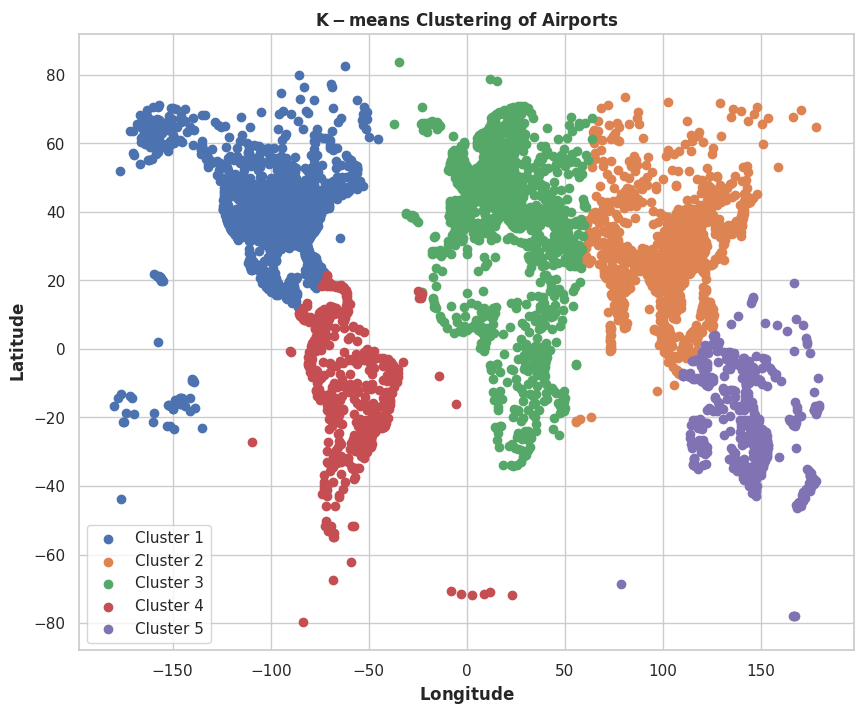

Cluster 1: Latitude: 39.94, Longitude: -100.03, Airports: 1753
Cluster 2: Latitude: 27.82, Longitude: 103.08, Airports: 923
Cluster 3: Latitude: 37.86, Longitude: 17.99, Airports: 1515
Cluster 4: Latitude: -10.02, Longitude: -60.63, Airports: 490
Cluster 5: Latitude: -20.59, Longitude: 142.88, Airports: 414


In [40]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['lat', 'lon']]

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['lon'], cluster_data['lat'], label=f'Cluster {i + 1}')

plt.title(r"$\bf{K-means\ Clustering\ of\ Airports}$")
plt.xlabel(r"$\bf{Longitude}$")
plt.ylabel(r"$\bf{Latitude}$")
plt.legend()
plt.show()

cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    airports_in_cluster = len(df[df['cluster'] == i])
    print(f"Cluster {i + 1}: Latitude: {center[0]:.2f}, Longitude: {center[1]:.2f}, Airports: {airports_in_cluster}")


K-means clustering analysis revealed distinct clusters of airports based on their geographical coordinates (latitude and longitude).
The clusters indicate potential patterns or groupings of airports, which could be related to geographical regions or airport types.